In [1]:
import pickle 
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
with open('/content/drive/MyDrive/i3d_feats.pickle', 'rb') as pf:
  data = pickle.load(pf)

In [4]:
seen_data = data['seen']
unseen_data = data['unseen']

In [5]:
seen_targets = seen_data['targets']

In [6]:
np.unique(seen_targets)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [7]:
np.unique(data['unseen']['targets'])

array([0, 1, 2, 3])

In [8]:
seen_features = seen_data['features'].reshape((-1, 400))
seen_features.shape

(18816, 400)

In [9]:
seen_data['classes'], data['unseen']['classes']

([0, 1, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 17], [7, 15, 2, 10])

In [10]:
ind_0 = np.where(seen_targets == 0)[0]
feat_0 = seen_features[ind_0, ...]

In [11]:
def get_class_feat(data):
  feats = data['features'].reshape((-1, 400))
  targets = data['targets']
  class_names = data['classes']
  all_names = ['lying' ,'sitting' ,'standing' ,'walking' ,'running' ,'cycling' ,'Nordic walking' ,'watching TV' ,'computer work' ,'car driving' ,'ascending stairs' ,'descending stairs' ,'vacuum cleaning' ,'ironing' ,'folding laundry' ,'house cleaning' ,'playing soccer' ,'rope jumping']

  uniques = np.unique(targets)
  res_classes, res_features = [], []
  for c in uniques:
    inds = np.where(targets == c)[0]
    feat = feats[inds, ...]
    mean_feat = np.mean(feat, axis=0)
    res_features.append(mean_feat)
    res_classes.append(all_names[class_names[c]])
  
  return res_classes, res_features

In [12]:
seen_classes, seen_feats = get_class_feat(data['seen'])
unseen_classes, unseen_feats = get_class_feat(data['unseen'])

In [13]:
unseen_classes

['watching TV', 'house cleaning', 'standing', 'ascending stairs']

In [14]:
np.array(seen_feats).shape, np.array(unseen_feats).shape

((14, 400), (4, 400))

In [15]:
dist_mat = np.abs(cosine_similarity(np.array(seen_feats), np.array(unseen_feats)))
dist_mat.shape

(14, 4)

In [19]:
df_data = dist_mat.T
df_index = pd.Index(unseen_classes, dtype='object', name='Useen Classes')
df_columns = pd.Index(seen_classes, dtype='object', name='Seen Classes')
dist_df = pd.DataFrame(data=df_data, index=df_index, columns=df_columns)
dist_df

Seen Classes,lying,sitting,walking,running,cycling,Nordic walking,computer work,car driving,descending stairs,vacuum cleaning,ironing,folding laundry,playing soccer,rope jumping
Useen Classes,,,,,,,,,,,,,,
watching TV,0.588837,0.728161,0.028742,0.289726,0.307595,0.337250,0.998607,0.046215,0.138821,0.395282,0.615768,0.680958,0.211665,0.100453
house cleaning,0.576871,0.766269,0.176656,0.089163,0.096956,0.057060,0.639014,0.015373,0.474176,0.823071,0.825052,0.832578,0.114423,0.375594
standing,0.602554,0.722687,0.020863,0.231370,0.184163,0.144577,0.771260,0.055887,0.256412,0.599357,0.927287,0.903085,0.077928,0.172142
ascending stairs,0.207665,0.512272,0.872877,0.724445,0.470158,0.704598,0.023559,0.326786,0.956822,0.669590,0.039313,0.023692,0.791787,0.792874


In [20]:
dist_df.index

Index(['watching TV', 'house cleaning', 'standing', 'ascending stairs'], dtype='object', name='Useen Classes')

In [23]:
seen_order = ['walking', 'Nordic walking', 'descending stairs', 'lying', 'sitting', 'vacuum cleaning', 'ironing', 'folding laundry', 'computer work', 'car driving', 'running', 'cycling', 'playing soccer', 'rope jumping']
dist_df = dist_df.loc[:, seen_order]

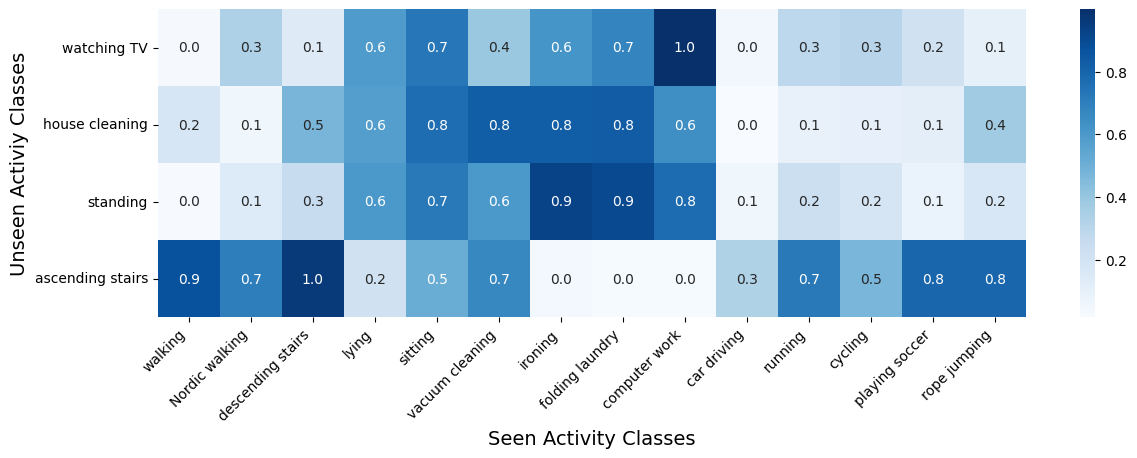

In [31]:
plt.figure(figsize=(14,4))
sns_plot = sns.heatmap(dist_df, annot=True, fmt=".1f", cmap="Blues")
plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=60)
plt.xlabel("Seen Activity Classes", size=14)
plt.ylabel("Unseen Activiy Classes", size=14)
sns_plot.figure.savefig('/content/seen_unseen_heatmap.png', format='png', dpi=800, bbox_inches='tight')

In [ ]:
np.mean(feat_0, axis=1).shape

(1695,)

In [ ]:
feat_0.shape, ind_0.shape

((1695, 400), (1695,))

In [ ]:
seen_data['features'].shape, seen_data['targets'].shape

((294, 64, 400), (18816, 1))

In [ ]:
seen_targets

array([[ 8],
       [ 2],
       [ 9],
       ...,
       [12],
       [ 4],
       [12]])